In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import librosa
from scipy.io import loadmat
# %matplotlib inline
import sys,os

sys.path.append(os.getcwd())
import TIMIT_loader as TIMIT 


OSError: Could not load shared object file: libllvmlite.so

##### Import the TIMIT_loader module
In this notebook we will explore the audio profile of the TIMIT dataset and loo at variabilities across different 
speakers and regional accents when uttering the same word.

First we import the dataset from the TIMIT module (own brew)

In [10]:
path = "/home/cocconat/Documents/Research/phd_project/speech/litwin-kumar_model_thesis/Spike TIMIT"
train = TIMIT.create_dataset(path)
spkrinfo, spkrsen = TIMIT.create_spkrdata(path)
# train

The Timit dataset has these features:


In [11]:
print("Unique sentences: {}".format(train.Sentence.nunique()));
# males = 
train.Speaker
females = train[train.apply(lambda row: row["Speaker"].startswith("F"), axis = 1)]
males  = train[train.apply(lambda row: row["Speaker"].startswith("M"), axis = 1)]
print("Unique female speakers: {}".format(females.Speaker.nunique()))
print("Unique male speakers: {}".format(males.Speaker.nunique()))




Unique sentences: 0
Unique female speakers: 0
Unique male speakers: 0


 
We now reduce the dataset to female speakers from one regional dialect (DR1).
We can achieve this by the supporting information offered with the TIMIT dataset.

In [12]:
fem_dr1= females[females.apply(lambda row: spkrinfo.loc[row.Speaker].DR == 1, axis=1)]

 
And select only those sentences that contain the most used words in the dataset:
"that", "had", "she", "me", "your", "year"

In [7]:
word_samples = TIMIT.find_word("she", fem_dr1)
path = word_samples.iloc[1].Path
print(word_samples.iloc[1].Words)

IndexError: single positional indexer is out-of-bounds

Using the sentence transcripts we can extrapolate the audio matching with a phone or a  
word.

The function chunk spectrum returns all the spectra and the chunk of oscillogram 
corresponding to a det linguistic or acoustic sign.

In [8]:
ph_samples = TIMIT.find_phone("ow", fem_dr1)
path = ph_samples.iloc[1].Path
words_data, ph_data= TIMIT.chunked_spectrum(path)

IndexError: single positional indexer is out-of-bounds

In [8]:
words_data

(['we', 'saw', 'eight', 'tiny', 'icicles', 'below', 'our', 'roof'],
 [array([[-37.943676, -37.200253, -36.546143, ..., -38.74565 , -37.659172,
          -36.741158],
         [-30.082478, -28.960526, -27.917667, ..., -20.620674, -20.99466 ,
          -21.426018],
         [-30.285475, -28.20372 , -26.392262, ..., -18.83866 , -19.604109,
          -20.434387],
         ...,
         [-80.15619 , -76.69747 , -80.10021 , ..., -50.495495, -47.234005,
          -54.460426],
         [-78.26148 , -79.74854 , -78.85403 , ..., -64.05029 , -40.032784,
          -42.364117],
         [-80.53944 , -80.16858 , -82.7083  , ..., -50.088043, -41.259686,
          -40.76966 ]], dtype=float32),
  array([[-35.518246, -35.131424, -34.918945, ..., -31.229343, -31.69259 ,
          -32.20177 ],
         [-22.489767, -23.124397, -23.827188, ..., -38.44272 , -36.605114,
          -35.21672 ],
         [-22.283466, -23.297445, -24.358786, ..., -36.322742, -35.34927 ,
          -34.452633],
         ...,
     

Once these matrices are generated they will be imported in Julia for the analysis of spectra and the simplified encodings.

In [6]:
Dong_words = ["that", "had", "she", "me", "your", "year"]


def word_start(word, threshold):
    for (n,x) in enumerate(np.mean(word,axis=0)):
        if x>threshold:
            return n

def align_spectrum(spectra, threshold):
    max = (0,0)
    starting_points=[]
    for s in spectra:
        sp = word_start(s,threshold)
        starting_points.append(sp)
        if max[1] < s.shape[1]-sp:
            max = s.shape
            max_sp = sp
    return starting_points,max, max_sp

#
    
    

In [30]:
samples = she_spectra
# starting_points, max, max_sp = align_spectrum(samples,-40 )        
fig, plot = plt.subplots(1, figsize=(12, 6))
for s in samples:
    w = word_start(s,-40)
    print(w)
    print(s.shape)
    print("############")
    plot.plot(np.mean(s[:,w:], axis=0))

NameError: name 'she_spectra' is not defined

In [27]:
    
# my_word = "daddy"
she_spectra = TIMIT.get_word_spectra("she", fem_dr1)
len(she_spectra)

ValueError: too many values to unpack (expected 4)

In [28]:
max_l = (0,0)
for s in she_spectra:
    if max_l[1]< s.shape[1]:
        max = s.shape
    print(s.shape)

NameError: name 'she_spectra' is not defined

In [29]:
plt.plot(np.mean(she_spectra[1],axis=0))
# starting_points, max, max_sp = align_spectrum(samples, -50)        

NameError: name 'she_spectra' is not defined

In [31]:
average = np.zeros(max, dtype =np.complex64)  

fig, plots = plt.subplots(len(samples), figsize=(12, 6))
for (s, p, sp) in zip(samples, plots, starting_points):
    new_ = np.zeros(max, dtype =np.complex64)  
    print(sp, max_sp, s.shape)
    new_[:,0:s.shape[1]-sp] = s[:,sp:]
    librosa.display.specshow(new_, sr=22050, hop_length=16, ax=p, fmin=200, bins_per_octave=4, x_axis="time", y_axis="cqt_note")
    average += new_/len(samples)
librosa.display.specshow( average, sr=22050, hop_length=16, fmin=200, bins_per_octave=4, x_axis="time", y_axis="cqt_note")

TypeError: expected sequence object with len >= 0 or a single integer

In [27]:
samples
starting_points
a = [sample.shape[1] for sample in samples]
a

[847, 745, 732, 758, 721, 680, 602, 803]

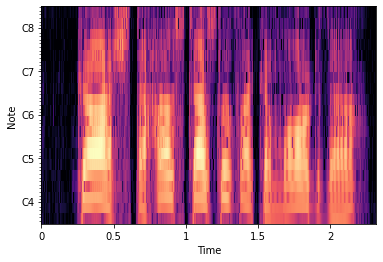

In [85]:
oscillogram, sr = librosa.load(path+".WAV")

# number of bins for each octave

# hop_length is the resolution
# fmin = 200, n_frequencies =20 
b = int(np.ceil(1/np.log2(238.3/200.3))) #4
cqt= librosa.cqt(oscillogram,sr=22050, hop_length=16, fmin=200,n_bins=20, bins_per_octave=b)

# use the log-energy (the decibels)
db = librosa.amplitude_to_db(abs(cqt))
# len(oscillogram)
librosa.display.specshow( db, sr=22050, hop_length=16, fmin=200, bins_per_octave=4, x_axis="time", y_axis="cqt_note")

# len(oscillogram)/final_time

(20, 5892)

In [ ]:
path= "/run/media/cocconat/data/speech_encoding/Spike TIMIT/Spike TIMIT/train/dr1/mrai0/sx72"
matpath= "/run/media/cocconat/data/speech_encoding/Spike TIMIT/Spike TIMIT/train/dr1/mrai0/sx72_spike_timing.mat"

oscillogram, ts, t, phone= TIMIT.get_phone(path, 0,1000)
spikes = loadmat(matpath)["spike_output"]

Set parameters to reproduce CQT as in:



In [ ]:
# number of bins for each octave
b = int(np.ceil(1/np.log2(238.3/200.3))) #4

# hop_length is the resolution
# fmin = 200, n_frequencies =20 
cqt= librosa.cqt(oscillogram,sr=22050, hop_length=16, fmin=200,n_bins=20, bins_per_octave=b)

# use the log-energy (the decibels)



AN example for the TIMIT dataset:
    - Oscillogram
    - Spectrogram with FFT
    - Spectrogram with CQT [1]
    
The parameters for the FFT are irrelevant, we will not use it. 

In [ ]:
fig, (plt1, plt2, plt3) = plt.subplots(3, figsize=(12, 6))

plt1.plot(ts,oscillogram)
X_vow = librosa.stft(oscillogram,hop_length=64, n_fft=512)
Xdb_vow_dict = librosa.amplitude_to_db(abs(X_vow))       
librosa.display.specshow(Xdb_vow_dict,ax=plt2,  sr=22050, hop_length=64, x_axis='time', y_axis='log',cmap="inferno")
plt.xlabel("Time")
librosa.display.specshow( db, sr=22050,ax=plt3, hop_length=16, fmin=200, bins_per_octave=4, x_axis="time", y_axis="cqt_note")

Now the tricky part:
1. When the SpikeTimit spike times are imported from the .mat file, they have a maximum spike-time of less than one. The Readme states the units are in msm, but is totally non-sensical since the duration of the samples is around 2 seconds. 

2. Furthermore, what the 620 neurons stand for? We have only 20 frequencies! There are 31 neurons for each frequency and the encoding at play is the _threshold encoding_. In this scheme, each neuron emits a spike when the log-energy of the frequency cross a reference threshold. 15 neurons signals the frequency log-power is increasing, 15 neurons it is decreasing. The 31st likely signals the top (or the bottom, see red-spots). However, the encoding scheme does not specify the mapping between the 620 neurons and the sub-classes.

To solve these issues I attempt an informed guess.

1. I opened a number of files, look at the length of the audio signal and the spike-times. I decided that all the data were rescaled in time of a factor 5.
2. The first 15 neurons encode the rise, the second encode the descend.

This solutions will work in the next future, but I will write to the authors to ask for clarifications


Set the params for spike encoding:
    - 20 frequencies (last is set to 8kHz in the paper instead than 5.2kHz)
    - each frequency has 15 threshold counters
    - time is rescaled of _f2_

In [ ]:
f2=5
freqs=[]
for k in range(0,20):
    freqs.append(200*np.power(2,k/b))


In the plot the white circles are the rising neurons, the black the decaying. Please consider that there should be another filter (the Masking effect) that is not applied in this spectrogram 

In [ ]:
fig, plt1 = plt.subplots(1, figsize=(12, 6))

librosa.display.specshow( db, ax=plt1, sr=22050,hop_length=16, fmin=200, bins_per_octave=4, x_axis="time", y_axis="cqt_note")
for n in range(1,620):
    if len(spikes[0,n]) > 0:
        xx = spikes[0,n][0]
        k = int(n/31)
        if n%31 > 15:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, facecolor='none', edgecolors='black')
        if n%31 < 15:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, facecolor='none', edgecolors='white')
        if n%31==0:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, c='red')

# plt.show()

[1] Pan, Zihan, Yansong Chua, Jibin Wu, Malu Zhang, Haizhou Li, and Eliathamby Ambikairajah. “An Efficient and Perceptually Motivated Auditory Neural Encoding and Decoding Algorithm for Spiking Neural Networks.” Frontiers in Neuroscience 13 (2020). https://doi.org/10.3389/fnins.2019.01420.

[2] Pan, Zihan, Haizhou Li, Jibin Wu, and Yansong Chua. “An Event-Based Cochlear Filter Temporal Encoding Scheme for Speech Signals.” In 2018 International Joint Conference on Neural Networks (IJCNN), 1–8, 2018. https://doi.org/10/ggx7c6.

In [ ]:
path= "/run/media/cocconat/data/speech_encoding/Spike TIMIT/Spike TIMIT/train/dr6/fapb0/sa2"
matpath= path+"_spike_timing.mat"


oscillogram, ts, t, phone= TIMIT.get_phone(path, 0,1000)
spikes = loadmat(matpath)["spike_output"]

# hop_length is the resolution
# fmin = 200, n_frequencies =20 
cqt= librosa.cqt(oscillogram,sr=22050, hop_length=16, fmin=200,n_bins=20, bins_per_octave=b)

# use the log-energy (the decibels)
db = librosa.amplitude_to_db(abs(cqt))
fig, plt1 = plt.subplots(1, figsize=(12, 6))

librosa.display.specshow( db, ax=plt1, sr=22050,hop_length=16, fmin=200, bins_per_octave=4, x_axis="time", y_axis="cqt_note")
for n in range(1,620):
    if len(spikes[0,n]) > 0:
        xx = spikes[0,n][0]
        k = int(n/31)
        if n%31 > 15:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, facecolor='none', edgecolors='black')
        if n%31 < 15:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, facecolor='none', edgecolors='white')
        if n%31==0:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, c='red')

# plt.show()

In [ ]:
path= "/run/media/cocconat/data/speech_encoding/Spike TIMIT/Spike TIMIT/train/dr6/fapb0/sx73"
matpath= path+"_spike_timing.mat"

oscillogram, ts, t, phone= TIMIT.get_phone(path, 0,1000)
spikes = loadmat(matpath)["spike_output"]

# hop_length is the resolution
# fmin = 200, n_frequencies =20 
cqt= librosa.cqt(oscillogram,sr=22050, hop_length=16, fmin=200,n_bins=20, bins_per_octave=b)

# use the log-energy (the decibels)
db = librosa.amplitude_to_db(abs(cqt))
fig, plt1 = plt.subplots(1, figsize=(12, 6))

librosa.display.specshow( db, ax=plt1, sr=22050,hop_length=16, fmin=200, bins_per_octave=4, x_axis="time", y_axis="cqt_note")
for n in range(1,620):
    if len(spikes[0,n]) > 0:
        xx = spikes[0,n][0]
        k = int(n/31)
        if n%31 > 15:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, facecolor='none', edgecolors='black')
        if n%31 < 15:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, facecolor='none', edgecolors='white')
        if n%31==0:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, c='red')

# plt.show()

In [ ]:
path= "/run/media/cocconat/data/speech_encoding/Spike TIMIT/Spike TIMIT/train/dr4/fcag0/sx423"
matpath= path+"_spike_timing.mat"

oscillogram, ts, t, phone= TIMIT.get_phone(path, 0,1000)
spikes = loadmat(matpath)["spike_output"]

# hop_length is the resolution
# fmin = 200, n_frequencies =20 
cqt= librosa.cqt(oscillogram,sr=22050, hop_length=16, fmin=200,n_bins=20, bins_per_octave=b)

# use the log-energy (the decibels)
db = librosa.amplitude_to_db(abs(cqt))
fig, plt1 = plt.subplots(1, figsize=(12, 6))

librosa.display.specshow( db, ax=plt1, sr=22050,hop_length=16, fmin=200, bins_per_octave=4, x_axis="time", y_axis="cqt_note")
for n in range(1,620):
    if len(spikes[0,n]) > 0:
        xx = spikes[0,n][0]
        k = int(n/31)
        if n%31 > 15:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, facecolor='none', edgecolors='black')
        if n%31 < 15:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, facecolor='none', edgecolors='white')
        if n%31==0:
            yy = freqs[k]*np.ones(len(xx))
            plt1.scatter(xx*f2,yy, c='red')

# plt.show()